(basics)=
# Grundbegriffe *Sensorik und Messwertverarbeitung*

## Lernziele für den Abschnitt *Grundbegriffe*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für das Modul:</b></div>
    <ul>
        <li> Definitionen von Grundbegriffen anwenden </li>
        <li> mithilfe von Kennlinien, Formeln und Datenblättern </li>
        <li> um Sensoren und Sensorsysteme korrekt beschreiben und analysieren zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [178]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [38]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Sensoren im Alltag

### Beispiel *Bimetall-Temperatursensor*

<a title="Phrontis, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Blinkgluehlampe_Bimetall_animated.gif"><img width="256" alt="Blinkgluehlampe Bimetall animated" src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Blinkgluehlampe_Bimetall_animated.gif"></a>

ein Sensor, der auch als Aktor wirkt

### Beispiel *Beschleunigungssensor im Smartphone*

In [6]:
IFrame("https://www.youtube.com/embed/W9p_KNRK-0Y", 600,338)

{cite:p}`stampfer_lab_2020`

### Beispiel *Abstandssensor für Fahrräder*

![Abstand, den Autofahrer beim Überholen von Fahrrädern einhalten](https://www.openbikesensor.org/visualisierung-2020-08_hu9df1c5b4354fa254275529b9481bfd70_65318_800x0_resize_catmullrom_3.png)

{cite:p}`openbikesensor_e_v_openbikesensor_2023`

## Was ist ein Sensor?

Sensor = die blaue Box?

![Foto vom Openbikesensor](https://www.openbikesensor.org/docs/user-guide/mounting/OBS_Mounting_VerticalCase_MainCase_Mount_huc37c0a5b3a0f9798aa41aa26b0db793e_7765440_600x0_resize_q75_catmullrom.jpg)

{cite:p}`openbikesensor_e_v_openbikesensor_2023`

Normiert in *DIN 1319-1 (1995-01) Grundlagen der Meßtechnik Teil 1: Grundbegriffe*

**Sensor** = **(Messgrößen-)Aufnehmer** = Teil eines Messgerätes oder einer Messeinrichtung, der auf eine Messgröße unmittelbar anspricht. Der Aufnehmer ist das erste Element einer Messkette. Es kann zwischen dem Aufnehmer als Ganzem und demjenigen Teil des Aufnehmers, der unmittelbar auf die Meßgröße empfindlich ist, unterschieden werden. Bei Verwendung des Begriffes Sensor muss dies klargestellt werden, da die Benennung nicht einheitlich gebraucht wird. 

Wo ist das *messgrößenempfindliche Element*?

![Auseinandergebautes Modell](https://www.openbikesensor.org/docs/hardware/construction-kit-00.03.10_hue721a11ac8ecd4296946435a351f8f79_288603_600x0_resize_q75_catmullrom.jpg)

{cite:p}`openbikesensor_e_v_openbikesensor_2023`

Wo auf der Platine ist das *messgrößenempfindliche Element*?

![Platine mit Sensor](https://www.openbikesensor.org/docs/hardware/general/collective-order/jsn-sr04t-v3.0_hud81a27fdf962bb6bf487928689d0271e_658700_600x0_resize_catmullrom_3.png)

nach bisschen lesen zeigt sich: Ultraschallsensor = messgrößenempfindliches Element

plausibel: Ultraschall benötigt wie Mikrofon Luftdruckänderungen - Löcher im Gehäuse sinnvoll

wenn jemand von *Sensor* spricht, könnte er folgendes meinen
- den Ultraschallmessaufnehmer
- die Platine vom Ultraschallmessaufnehmer (die das Signal vorkonditioniert)
- ...
- bis hin zur (blauen oder orangen) Box, in der sich der Sensor und die Auswerteeinheit befindet

Für die Bewertung eines Sensors ist meist das ganze Sensorsystem (inklusive Auswertung und Gehäuse) relevant!

## Was misst ein Sensor?

**AUFGABE IN GRUPPEN**: Nutzen Sie die Definitionen aus DIN 1319-1 unten, um folgendes am Beispiel des openbikesensor zu erklären:
1. Aus welchen Messsignalen entsteht der Abstandswert?
2. Welche typischen Werte ergeben sich für den wahren Wert, den erwarteten Wert und die systematische und zufällige Abweichung?
3. Geben Sie die Messkette an.

## Grundbegriffe der Messtechnik nach DIN 1319-1

### Was wird gemessen

**Messgröße** (*measurand*): physikalische Größe, der die Messung gilt (beim openbikesensor der Abstand zwischen Fahrradlenker außen und vorbeifahrendem Fahrzeug), kann von weiteren physikalischen Größen abhängen und zeitvariabel sein

**Messobjekt** (*measuring object*): Träger der Messgröße, kann aus Körpern, Vorgängen oder Zuständen bestehen (beim openbikesensor gehören Fahrrad und Fahrzeug und deren Abstand dazu)

### Was stimmt

**Wahrer Wert (einer Messgröße)** (*true value*) $x_w$: tatsächlicher Wert der Messgröße, kann nur geschätzt werden anhand statistischer Methoden

**Richtiger Wert (einer Messgröße)** (*conventional true value*): bekannter Wert aus Kalibration, dessen Abweichung vom wahren Wert als vernachlässigbar betrachtet wird

### Was ist messen

**Messung (Messen einer Messgröße)** (*measurement*): Ausführen von geplanten Tätigkeiten zum quantitativen Vergleich der Messgröße (s.o.) mit einer (physikalischen) Einheit

**dynamische Messung** (*dynamic measurement*): Messung, entweder einer zeitlich veränderbaren Messgröße oder einer Messgröße, deren Wert sich aufgrund des Messprinzips aus zeitlichen Änderungen anderer Größen ergibt (Ultraschallabstandsmessung ist ein Beispiel dafür)

**statische Messung** (*static measurement*): Messung, entweder einer zeitlich unveränderlichen Messgröße oder einer Messgröße, deren Wert nicht auf zeitlichen Veränderungen anderer Messgrößen beruht (z. B. mit Lineal Abstand messen)

**zählen** (*counting*): Ermitteln des Wertes einer Messgröße als Anzahl der Elemente einer Menge, z. B. Anzahl Kugeln oder Teilchen, Anzahl von Radumdrehungen oder auch digitalen Impulsen

### Was ist prüfen

**Prüfung** (*inspection*): feststellen, inwieweit ein Prüfobjekt eine Forderung erfolgt, erfolgt häufig mit einem Messgerät

**Klassierung** (*grouping*): Zuordnen der Elemente zu einer Menge zu festgelegten Klassen von Merkmalswerten, z. B. Häufigkeit eines Signals oberhalb eines Schwellwerts

### Wie funktioniert eine Messung

**Messprinzip** (*principle of measurement*): Physikalische Grundlage der Messung

**Messmethode** (*method of measurement*): spezielle, vom Messprinzip unabhängige Art des Vorgehens bei der Messung, z. B. Vergleich, Susbstitution, Differenz, Kompensation, Nullabgleich, Ausschlag, analog, digital, direkt, indirekt

**Messverfahren** (*measurement procedure*): praktische Anwendung eines Messprinzips und einer Messmethode, z. B. thermoelektrische Temperaturmessung mit Drehspulmessgerät nach der Ausschlag-Messmethode

![Grundlegende Messverfahren](../img/messverfahren.png)

**Einflussgröße** (*influence quantity*): Größe, die nicht Gegenstand der Messung ist, jedoch die Messgröße oder die Ausgabe beeinflusst, z. B. Umgebungstemperatur, Feuchte, Luftdruck, ...

### Was sieht die Messung

**Messsignal** (*measurement signal*): Größe in einem Messgerät oder einer Messeinrichtung, die der Messgröße eindeutig zugeordnet ist, z. B. Messgröße Frequenz der akustischen Schwingung für Messsignal elektrische Wechselspannung

**Wiederholbedingungen** (*repeatability conditions*): Bedingungen, unter denen einzelne Messwerte für dieselbe Messgröße unabhängig voneinander so gewonnen werden, dass die systematische Messabweichung für jeden Messwert die Gleiche bleibt

**erweiterte Vergleichbedingungen** (*reproducibility conditions*): Bedingungen, unter denen eine Gesamtheit unabhängiger Messergebnisse für dieselbe spezielle Messgröße so gewonnen wird, dass durch Vergleich Unterschiede der systematischen Messabweichungen erkennbar werden, teilweise als Ringvergleich in unterschiedlichen Laboren realisiert

### Was sind Messwerte

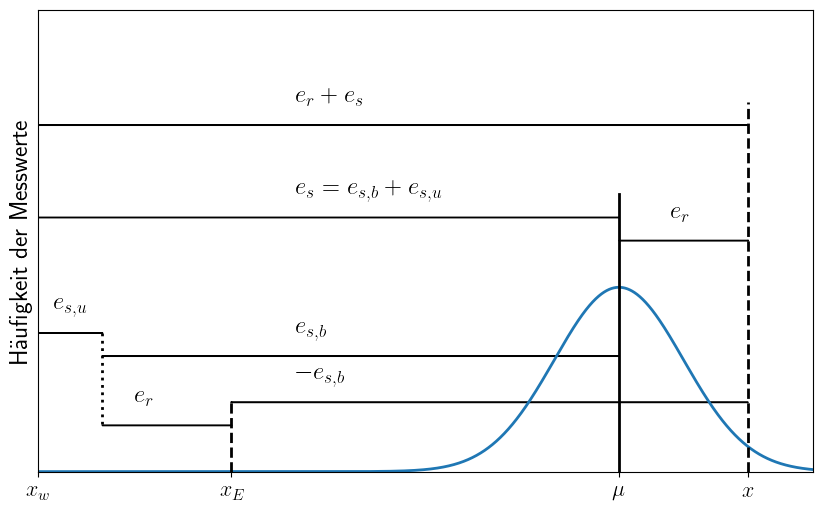

In [106]:
inputsignal = np.arange(0,15,0.001)
xw = 0
esu = 1
er = 2
esb = -6
plt.plot(inputsignal, norm.pdf(inputsignal-esu-er+esb,0,1))
plt.xticks([0,3,9,11], [r'$x_w$',r'$x_E$', r'$\mu$',r'$x$'])
plt.yticks([],[])
plt.ylabel('Häufigkeit der Messwerte')
plt.axis([0,12,0,1])
plt.arrow(x=0, y=.3, dx=1, dy=0)
plt.text(0.25,.35,r'$e_{s,u}$')
plt.plot([1,1],[0.3,0.1],'k:')
plt.arrow(x=1, y=.1, dx=2, dy=0)
plt.text(1.5,0.15,r'$e_r$')
plt.plot([3,3],[0,.15],'k--')
plt.arrow(x=11, y=.15, dx=-8, dy=0)
plt.text(4,.2,r'$-e_{s,b}$')
plt.arrow(x=1, y=.25, dx=8, dy=0)
plt.text(4,.3,r'$e_{s,b}$')
plt.plot([9,9],[0,.6],'k-')
plt.plot([11,11],[0,.8],'k--')
plt.arrow(x=0, y=.55, dx=9, dy=0)
plt.text(4,.6,r'$e_s = e_{s,b}+e_{s,u}$')
plt.arrow(x=9, y=.5, dx=2, dy=0)
plt.text(9.8,.55, r'$e_r$')
plt.arrow(x=0, y=.75, dx=11, dy=0)
plt.text(4,.8,r'$e_r+e_s$')
plt.show()

**Ausgabe** (*Output*): Durch ein Messgerät oder eine Messeinrichtung bereitgestellte und in einer vorgesehenen Form ausgegebene Information über den Wert einer Messgröße.

**Messwert** (*Measured value*): Wert, der zur Messgröße gehört und der Ausgabe eines Messgerätes oder einer Messeinrichtung eindeutig zugeordnet ist, bestehend aus wahrem Wert $x_w$, zufälliger Messabweichung $e_r$ und systematischer Messabweichung $e_s$

\begin{equation}
x = x_w + e_r + e_s
\end{equation}

**Erwartungswert** (*expectation*) $\mu$: Wert, der zur Messgröße gehört und dem sich das arithmetische Mittel der Messwerte der Messgröße mit steigender Anzahl der Messwerte nähert, die aus Einzelmessungen unter denselben Bedingungen gewonnen werden können, siehe auch DIN 55350-21 und DIN 13303-1

**Messergebnis** (*result of measurement*): Aus Messungen gewonnener Schätzwert für den wahren Wert einer Messgröße, erfolgt meist durch die Anwendung statistischer Schätzmethoden auf $n$ unter Wiederholbedingungen gewonnene Messwerte $x_i$ ($i=1,...n$)

\begin{equation}
\text{unberichtigtes Messergebnis }\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

\begin{equation}
\text{Messergebnis } \bar{x_E} = \bar{x} - e_{s,b}
\end{equation}

**berichtigen** (*correcting*): Beseitigen der im Unberichtigten Messergebnis $\bar{x}$ enthaltenen systematischen Messabweichung $e_{s,b}$

**Korrektion** (*correction*) $-e_{s,b}$: Wert, der nach algebraischer Addition zum unberichtigten Messergebnis oder zum Messwert die bekannte systematische Messabweichung ausgleicht

| Abweichung | Systematisch | Beispiel | Zufällig | Beispiel |
|---|---|---|---|---|
|Hinweise |  Unsymmetrische Häufung der Messwerte von Wiederholungsmessungen | | Symmetrische Häufung der Messwerte um einen häufigsten Wert | |
| Ursachen | Falsche Kalibrierung der Messgeräte | Falsch eingestellter Nullpunkt | Schwankungen beim Anlegen von Maßstäben | Elektronische Triggerschwankungen |
| | Ablesefehler | Parallaxenfehler | Schätzung von Zwischenwerten auf Maßstäben | |
| | Falsche Messgerätejustierung | Nicht horizontale Aufstellung | | |
| | Messwertdriften | Messverfahren verändert Messgröße | | |
| Abhilfen | Konsistenzmessungen | Eichpunkte, Messbereichsumschaltung | keine | Messgenauigkeit entspricht Messfehler |
| | Stabilisierende Maßnahmen | Thermostatisierung, Vakuumschutz | keine | " |
| | Einsatz unterschiedlicher Messverfahren | | | |
| Dokumentation | Angabe von Namen, Prüfort (ggf. amtl. Zulassung, Messgeräten und Messdatum | | Angabe der Abweichung nach mathematischer Analyse (Fehlerrechnung) | |

### Was weicht bei Messungen ab

**Messabweichung** (*(absolute) error of measurement*) $m-x_w$: Abweichung einer aus Messungen gewonnenen und der Messgröße zugeordenten Wertes $m$ vom wahren Wert $x_w$

**zufällige Messabweichung** (*random error*) $e_r=\mu-\bar{x}$: Abweichung des unberichtigten Messergebnisses $\bar{x}$ vom Erwartungswert $\mu$

**systematische Messabweichung** (*systematic error*) $e_s = x_w - \mu$: Abweichung des Erwartungswertes $\mu$ vom wahren Wert $x_w$, unter Wiederholbedingungen bleibt die systematische Messabweichung konstant, unter erweiterten Vergleichsbedingungen ergeben sich Unterschiede, dabei ist $e_s = e_{s,b} + e_{s,u}$ die Summe aus der bekannten systematischen Messabweichung $e_{s,b}$ und der unbekannten systematischen Messabweichung $e_{s,u}$

### Wie sicher ist das Messergebnis (wie *genau*)

**Messunsicherheit** (*uncertainty of measurement*) $u$: Kennwert, der aus Messungen gewonnen wird und zusammen mit dem Messergebnis $M$ zur Kennzeichnung eines Wertebereiches für den wahren Wert der Messgröße $x_w$ dient, d.h. $x_w\in[M-u;M+u]$, zur quantitativen Ermittlung siehe auch DIN 1319-4

**relative Messunsicherheit** (*relative uncertainty of measurement*) $\frac{u}{\vert M \vert}$: Messunsicherheit $u$ bezogen auf den Betrag des Messergebnisses $\vert M \vert$

**Wiederholstandardabweichung** $\sigma_r$ (*repeatability standard deviation*): Standardabweichung von Messwerten unter Wiederholbedingungen, bei genügender Anzahl von Messwerten $x_i$ ($i=1,..,n$) kann die empirische Standardabweichung $s=\sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2}$ die Wiederholstandardabweichung $\sigma_r$ ersetzen

**Vergleichstandardabweichung** (*reproducibility standard deviation*): Standardabweichung von Messergebnissen unter erweiterten Vergleichbedingungen (s.o.)

**vollständiges Messergebnis**: Messergebnis mit quantitativen Angaben zur Genauigkeit $x = M\pm u = M\cdot(1+\frac{u}{\vert M \vert})$, dabei Rundungsregeln nach DIN 1333 anwenden

### Wie sieht der Messaufbau aus

**Messgerät** (*measuring instrument*): Gerät, das allein oder in Verbindung mit anderen Einrichtungen für die Messung einer Messgröße vorgesehen ist

**Messeinrichtung** (*measuring system*): Gesamtheit aller Messgeräte und zusätzlicher Einrichtungen zur Erzielung eines Messergebnisses

**Messkette** (*measuring chain*): Folge von Elementen eines Messgerätes oder einer Messeinrichtung, die den Weg des Messsignals von der Aufnahme der Messgeräte bis zur Bereitstellung der Ausgabe bildet

![Messkette](https://upload.wikimedia.org/wikipedia/de/thumb/4/49/Messkette.svg/1024px-Messkette.svg.png?20090608141611)

**(Messgrößen-)Aufnehmer** (*sensor*): Teil eines Messgerätes oder einer Messeinrichtung, der auf eine Messgröße unmittelbar anspricht, erstes Element einer Messkette, unterscheidbar in den Aufnehmer als ganzem und demjenigen Teil des Aufnehmers, der unmittelbar auf die Messgröße empfindlich ist

**Maßverkörperung** (*material measure*): Gerät, das einen oder mehrere feste Werte einer Größe darstellt oder liefert

**Referenzmaterial** (*reference material*): Material oder Substanz mit Merkmalen, deren Werte für den Zweck der Kalibrierung, der Beurteilung eines Messverfahrens oder der quantitativen Ermittlung von Materialeigenschaften ausreichend festliegen

**Normal** (*measurement standard/etalon*): Messgerät, Messeinrichtung oder Referenzmaterial, die den Zweck haben, eine Einheit oder einen oder mehrere bekannte Werte einer Größe darzustellen, zu bewahren oder zu reproduzieren, um diese an andere Messgeräte durch Vergleich weiterzugeben

**Eingangsgröße eines Messgeräts** (*input quantity*): Größe, die von einem Messgerät, einer Messeinrichtung, oder einer Messkette am Eingang wirkungsmäßig erfasst werden soll

**Ausgangsgröße eines Messgeräts** (*output quantity*): Größe, die am Ausgang eines Messgerätes, einer Messeinrichtung oder einer Messkette als Antwort auf die erfasste Eingangsgröße vorliegt

**Kalibrierung** (*calibration*): Ermitteln des Zusammenhangs zwischen Messwert oder Erwartungswert der Ausgangsgröße und dem zugehörigen wahren oder richtigen Wert der als Eingangsgröße vorliegenden Messgröße für eine betrachtete Messeinrichtung bei vorgegebenen Bedingungen, im engeren Sinn Ermittlung eines mathematischen Zusammenhangs in Form einer Kalibrierfunktion, siehe auch DIN 55350-34

**Justierung** (*adjustment*): Einstellen oder Abgleichen eines Messgerätes, um systematische Messabweichungen so weit zu beseitigen, wie es für die vorgesehene Anwendung erforderlich ist

### Was kann ein Messaufbau

**Messbereich** (*specified measuring (working) range*): Bereich derjenigen Werte der Messgröße, für den gefordert ist, dass die Messabweichungen eines Messaufbaus innerhalb festgelegter Grenzen bleiben

**Übertragungsverhalten** (*response characteristic*): Beziehung zwischen den Werten der Eingangsgröße und den zugehörigen Werten der Ausgangsgröße eines Messgerätes unter Bedingungen, die Rückwirkung des Messgerätes ausschließen, im eingeschwungenen Zustand ergibt das eine Wertetabelle bzw. Kennlinie, siehe DIN 19226-2, bei Sprungantworten nennt man die Funktion Übergangsfunktion

**Ansprechschwelle** (*discrimination threshold*): Kleinste Änderung des Wertes der Eingangsgröße, die zu einer erkennbaren Änderung des Wertes der Ausgangsgröße eines Messgerätes führt, bei integrierenden Messgeräten derjenige Wert bei welchem die erste eindeutige Anzeige erkennbar wird, andersherum heißt der Wert, innerhalb dessen die Eingangsgröße sich ändern kann ohne die Ausgangsgröße zu beeinflussen Totzone

**Empfindlichkeit** (*sensitivity*): Änderung des Wertes der Ausgangsgröße eines Messgerätes bezogen auf die sie verursachende Änderung des Wertes der Eingangsgröße, kann ggf. in Anfangs- und Endempfindlichkeit (bezogen auf den Messbereich) unterschieden werden

**Auflösung** (*resolution*): Angabe zur quantitativen Erfassung des Merkmals eines Messgerätes, zwischen nahe beieinanderliegenden Messwerten eindeutig zu unterscheiden

**Hysterese eines Messgerätes** (*hysteresis*): Merkmal eines Messgerätes, das darin besteht, dass der zu ein und demselben Wert der Eingangsgröße sich ergebende Wert der Ausgangsgröße von der vorausgegangenen Aufeinanderfolge der Werte der Eingangsgröße abhängt

**Rückwirkung eines Messgerätes**: Einfluss eines Messgerätes bei seiner Anwendung, der bewirkt, dass sich die vom Messgerät zu erfassende Größe von derjenigen Größe unterscheidet, die am Eingang des Messgerätes tatsächlich vorliegt

**Messgerätedrift** (*drift*): Langsame zeitliche Änderung des Wertes eines messtechnischen Merkmals eines Messgerätes

**Einstelldauer** (*response time, setting time*): Zeitspanne zwischen dem Zeitpunkt einer sprunghaften Änderung des Wertes der Eingangsgröße eines Messgerätes und dem Zeitpunkt, ab dem der Wert der Ausgangsgröße dauernd innerhalb vorgegebener Grenzen bleibt, auch Einschwingzeit genannt

**Messabweichung eines Messgerätes** (*error of indication of a measuring instrument*): Derjenige Beitrag zur Messabweichung, der durch ein Messgerät verursacht wird

**festgestellte systematische Messabweichung** $A_s = \bar{x_a} - x_r$ (*bias error*): geschätzter Beitrag eines Messgerätes zur systematischen Messabweichung bestehend aus dem Mittelwert der abgelesenen Werte $\bar{x_a}$ minus dem richtigen Wert $x_r$

**Fehlergrenzen** $G$ (*limits of permissible error, maximum permissible errors*): Abweichungsgrenzbeträge für Messabweichungen eines Messgerätes, bei symmetrischen Fehlergrenzen ist $G_o = G_u = G$ (obere Fehlergrenze = untere Fehlergrenze = Fehlergrenze)

## Physikalische Sensoren

... wandeln ein physikalisches Signal in ein (in der Regel) elektrisches Signal um {cite:p}`parthier_messtechnik:_2016` {cite:p}`niebuhr_physikalische_2011`

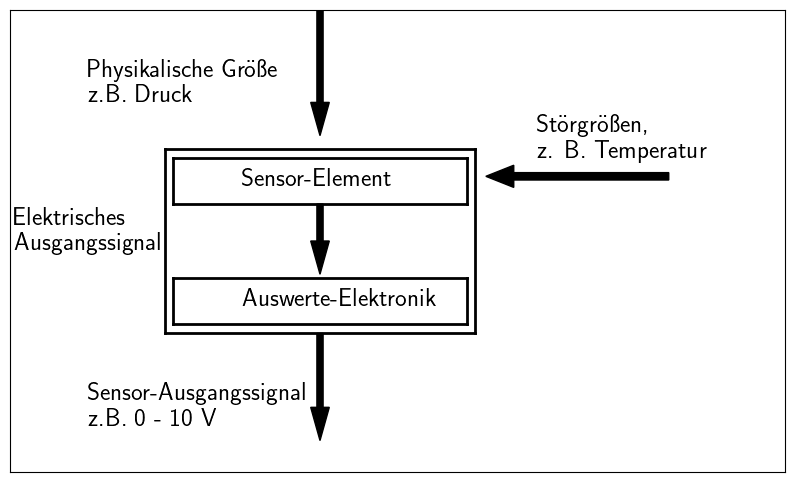

In [177]:
plt.axis([0,10,0,5])
plt.xticks([])
plt.yticks([])
plt.arrow(x=4,y=5,dx=0,dy=-1,width=.08,facecolor='black')
plt.text(1,4,'Physikalische Größe\nz.B. Druck')
plt.plot([2,6],[3.5,3.5],'k-')
plt.plot([2,2],[1.5,3.5],'k-')
plt.plot([6,6],[1.5,3.5],'k-')
plt.plot([2,6],[1.5,1.5],'k-')
plt.plot([2.1,5.9],[3.4,3.4],'k-')
plt.plot([2.1,2.1],[2.9,3.4],'k-')
plt.plot([5.9,5.9],[2.9,3.4],'k-')
plt.plot([2.1,5.9],[2.9,2.9],'k-')
plt.text(3,3.1,'Sensor-Element')
plt.arrow(x=8.5,y=3.2,dx=-2,dy=0,width=.08,facecolor='black')
plt.text(6.8,3.4,'Störgrößen,\nz. B. Temperatur')
plt.arrow(x=4,y=2.9,dx=0,dy=-.4,width=.08,facecolor='black')
plt.text(.05,2.4,'Elektrisches\nAusgangssignal')
plt.plot([2.1,5.9],[1.6,1.6],'k-')
plt.plot([2.1,2.1],[1.6,2.1],'k-')
plt.plot([5.9,5.9],[1.6,2.1],'k-')
plt.plot([2.1,5.9],[2.1,2.1],'k-')
plt.text(3,1.8,'Auswerte-Elektronik')
plt.arrow(x=4,y=1.5,dx=0,dy=-.8,width=.08,facecolor='black')
plt.text(1,.5,'Sensor-Ausgangssignal\nz.B. 0 - 10 V')
plt.show()

## Übungsaufgaben

### Absolute und relative Messabweichung

Der Widerstand eines Shunts für Strommesszwecke wurde im Kalibrierlabor mit aufwendigen Messverfahren bestimmt zu $R = 0,207\text{ }\Omega$. Damit kann dieser Wert als richtiger Wert $x_r$ des Shuntwiderstandes für Betriebsmittel angenommen werden. Die Messung des Shunts mit einem Betriebsmessgerät ergab einen Schätzwert für die Messgröße von $x=0,212\text{ }\Omega$. Gesucht sind die absolute Abweichung $A$ und die relative Abweichung $A_{\text{rel}}$ jeweils bezogen auf den richtigen Wert von $R$ und den Schätzwert. Diskutieren Sie die relativen Abweichungen.

*Lösung an der Tafel*

### Systematische Abweichung berechnen

Es ist für die Messschaltung entsprechend dem Bild die bekannte systematische Abweichung zu berechnen. Dabei sollen der Einfachheit halber nur die Widerstände der Messkabel berücksichtigt werden, d.h. z. B. Übergangswiderstände an Steckkontakten bleiben unberücksichtigt. Länge der zwei Laborkabel $l=2\text{ m}$, Kabelquerschnitt $A=0,5\text{ mm}^2$, Leitermaterial Kupfer mit einem spezifischen Widerstand $\rho=0,0175\text{ }\Omega\cdot\text{mm}^2/\text{m}$, Messstrom $I=\text{const.}=100\text{ mA}$.

- [ ] TODO noch plotten: wie auf F20 in 01_pdf (R_x, 2 Zuleitungswiderstände, const. Strom und Gesamtspannung)

*Lösung an der Tafel*

### Systematische Abweichung als Gesamtabweichung berechnen

Im Gleichstromkreis werden gleichzeitig Strom- und Spannungsmessung mit einer stromrichtigen Messschaltung an einem Widerstand $R_V$ durchgeführt. Innenwiderstand des Strommmessers $R_{iA} = 0,5\text{ }\Omega$, Innenwiderstand des Spannungsmessers $R_{iV} = 150\text{ M}\Omega$, Messwerte $U=1,25\text{ V}$, $I=0,2\text{ A}$. Bestimmen Sie die bekannte systematische Abweichung der Leistung $\Delta P$ über $R_V$ und das korrigierte Messergebnis der Leistung $P_K$.

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```